### 1. Import Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Immersion\Achievement_6\WorldEnergyConsumptionAnalysis'

In [3]:
# import the dataframe
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'T3.csv'), index_col = False)

### 2. Data Cleaning

In [4]:
df.head()

,Unnamed: 0,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,...,wind_energy_per_capita,wind_share_elec,wind_share_energy,electrification_rate,fossils?,renewables?,nuclear?,continent,gdp_per_capita,income_group
0,0,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,4.45,yes,yes,no,Asia,577.383256,low-income
1,1,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,9.29,yes,yes,no,Asia,559.778453,low-income
2,2,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,14.13,yes,yes,no,Asia,895.459054,low-income
3,3,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,18.97,yes,yes,no,Asia,930.634461,low-income
4,4,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,23.81,yes,yes,no,Asia,948.161439,low-income


In [6]:
# drop 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'wind_energy_per_capita', 'wind_share_elec', 'wind_share_energy',
       'electrification_rate', 'fossils?', 'renewables?', 'nuclear?',
       'continent', 'gdp_per_capita', 'income_group'],
      dtype='object', length=136)

In [7]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,wind_energy_per_capita,wind_share_elec,wind_share_energy,electrification_rate,fossils?,renewables?,nuclear?,continent,gdp_per_capita,income_group
0,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,4.45,yes,yes,no,Asia,577.383256,low-income
1,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,9.29,yes,yes,no,Asia,559.778453,low-income
2,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,14.13,yes,yes,no,Asia,895.459054,low-income
3,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,18.97,yes,yes,no,Asia,930.634461,low-income
4,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,23.81,yes,yes,no,Asia,948.161439,low-income


In [10]:
df.shape

(3130, 136)

In [11]:
# check for missing values
df.isnull().sum()

country             0
year                0
iso_code            0
population          0
gdp                 0
                 ... 
renewables?         0
nuclear?          116
continent           0
gdp_per_capita      0
income_group        0
Length: 136, dtype: int64

#### We have missing values for the 'nuclear?' column, which checks the existence of nuclear powerplants in a country. This column has no relevance for the analysis at hand and can be left as it is. 

In [15]:
# check for duplicates
dups = df.duplicated()

In [16]:
dups.shape

(3130,)

#### There are no duplicates in the dataframe

<Axes: xlabel='carbon_intensity_elec', ylabel='Density'>

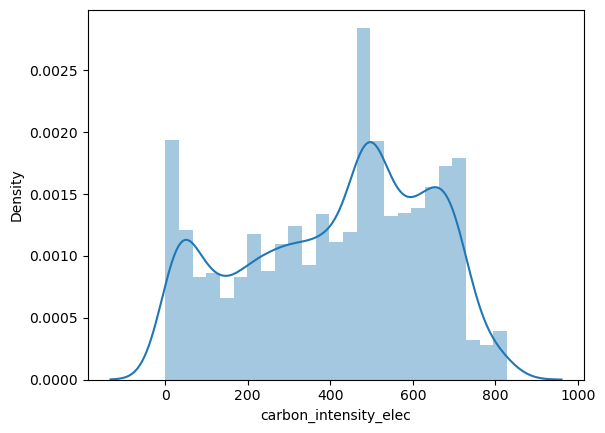

In [18]:
# check for extreme values
sns.distplot(df['carbon_intensity_elec'], bins = 25)

#### There are no extreme values

In [17]:
# check some basic stat for the 'carbon_intensity_elec' column
df['carbon_intensity_elec'].describe()

count    3130.000000
mean      412.324743
std       220.463963
min         0.000000
25%       232.786000
50%       459.627000
75%       593.664250
max       827.586000
Name: carbon_intensity_elec, dtype: float64

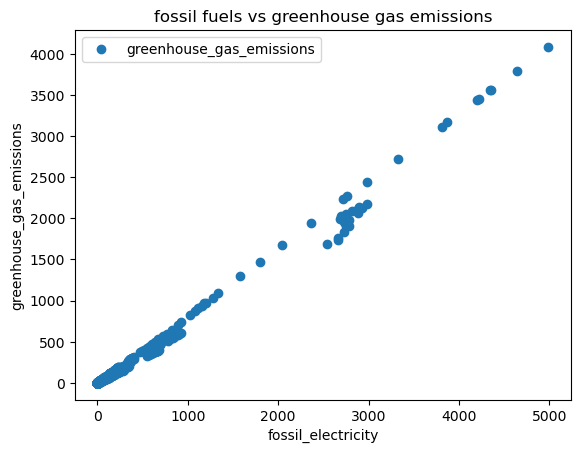

In [27]:
# scatterplot of 'fossil_electricity' vs 'greenhouse_gas_emissions'
df.plot(x = 'fossil_electricity', y = 'greenhouse_gas_emissions', style = 'o')
plt.title ('fossil fuels vs greenhouse gas emissions')
plt.xlabel ('fossil_electricity')
plt.ylabel ('greenhouse_gas_emissions')
plt.show()

#### This result is expected as the fossil fuels are the cause for greenhouse gas emissions

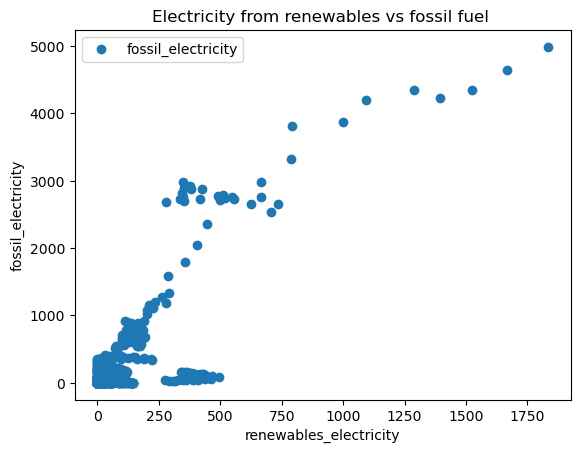

In [66]:
# scatterplot of 'gdp_per_capita' vs 'greenhouse_gas_emissions'
df.plot(x = 'renewables_electricity', y = 'fossil_electricity',  style = 'o')
plt.title ('Electricity from renewables vs fossil fuel ')
plt.xlabel ('renewables_electricity')
plt.ylabel ('fossil_electricity')
plt.show()

#### This result is worrisome as it shows that increase in renewables seems not be compensated by a decrease in fossil fuels, or in other words, in the last 19 years, more renewables didnot translate to less greenhouse gas emissions.

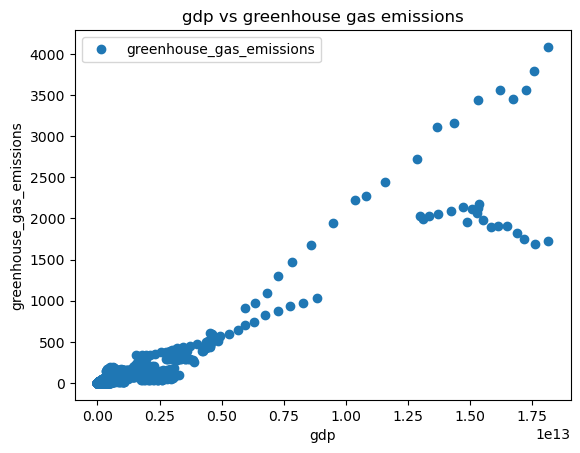

In [56]:
# scatterplot of 'gdp' vs 'greenhouse_gas_emissions'
df.plot(x = 'gdp', y = 'greenhouse_gas_emissions', style = 'o')
plt.title ('gdp vs greenhouse gas emissions')
plt.xlabel ('gdp')
plt.ylabel ('greenhouse_gas_emissions')
plt.show()

#### This plot seems to convey that increase in gdp leads to increase in greenhouse gas emissions in most cases

### 3. Hypotheses

#### The following two hypotheses will be tested in this exercise:
 1. The higher the gdp, the higher the greenhouse gas emissions
 2. The more electricity is generated from renewables, the more it is also generated from fossil fuels

#### 3.1 Hypothesis 1

In [67]:
# Reshape the variables into NumPy arrays and put them into separate objects 

X = df['gdp'].values.reshape(-1,1)
y = df['greenhouse_gas_emissions'].values.reshape(-1,1)

In [68]:
X

array([[1.12837929e+10],
       [1.10212731e+10],
       [1.88048712e+10],
       ...,
       [2.09617940e+10],
       [2.19478364e+10],
       [2.27153531e+10]])

In [69]:
y

array([[0.12],
       [0.07],
       [0.1 ],
       ...,
       [3.02],
       [2.67],
       [3.27]])

In [70]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 3.2 Hypothesis 2

In [71]:
# Reshape the variables into NumPy arrays and put them into separate objects 

B = df['renewables_electricity'].values.reshape(-1,1) # independent variable
a = df['fossil_electricity'].values.reshape(-1,1) # dependent variable

In [72]:
B

array([[0.31],
       [0.5 ],
       [0.56],
       ...,
       [3.32],
       [4.3 ],
       [5.46]])

In [73]:
a

array([[0.16],
       [0.09],
       [0.13],
       ...,
       [3.5 ],
       [3.05],
       [3.73]])

In [74]:
# split the data into training and test set
B_train, B_test, a_train, a_test = train_test_split(B, a, test_size=0.3, random_state=0)

### 4. Regression Analysis

#### 4.1 gdp vs greenhouse gas emission

In [75]:
# create a regression object.
regression = LinearRegression()  

In [76]:
# fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [77]:
# predict the values of y using X.
y_predicted = regression.predict(X_test)

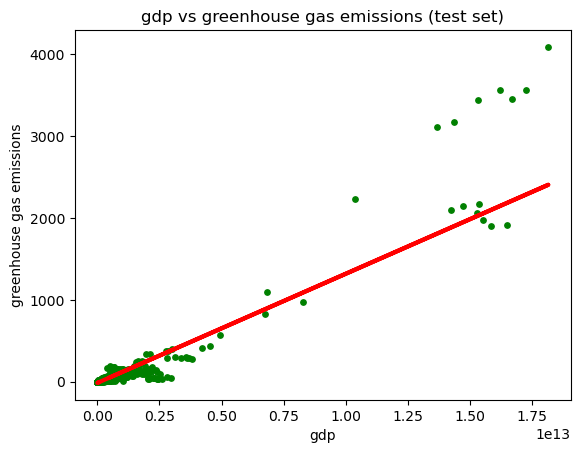

In [92]:
# create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('gdp vs greenhouse gas emissions (test set)')
plot_test.xlabel('gdp')
plot_test.ylabel('greenhouse gas emissions')
plot_test.show()

In [80]:
# create objects that contain the model summary statistics and print the result.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.33202898e-10]]
Mean squared error:  17362.00652792915
R2 score:  0.8655551048733284


In [114]:
# create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,3.71,-12.019816
1,0.05,-13.674985
2,11.11,29.504553
3,12.69,124.198226
4,2.21,-7.252694
5,2.06,-6.791837
6,0.02,-13.443323
7,0.49,-10.178852
8,3.29,-11.535384
9,0.01,-13.894797


In [86]:
# compare how the regression fits the training set 
y_predicted_train = regression.predict(X_train) 

In [88]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.33202898e-10]]
Mean squared error:  5347.021367406203
R2 score:  0.8853092487776227


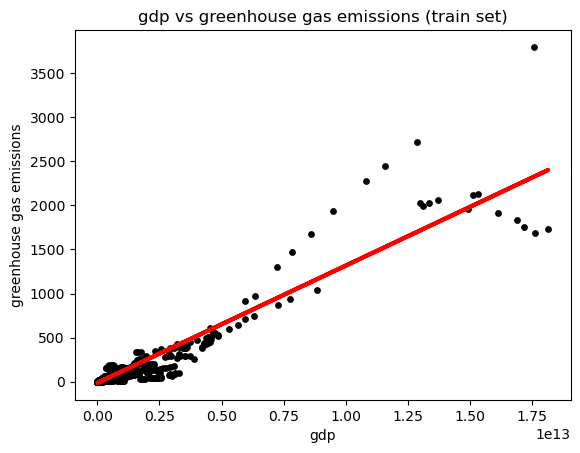

In [91]:
# visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='black', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('gdp vs greenhouse gas emissions (train set)')
plot_test.xlabel('gdp')
plot_test.ylabel('greenhouse gas emissions')
plot_test.show()

#### Comment
While the model has a value for R2 close to 1, its rmse value of 17362 is very high. Linear model is not a good predictor. This can also be confirmed by looking at the model's predicted values, which are very far from the actual values.

#### 4.2 renewables_electricity vs fossil_electricity

In [93]:
# create a regression object.
regression2 = LinearRegression()  

In [94]:
# fit the regression object onto the training set.
regression2.fit(B_train, a_train)

LinearRegression()

In [95]:
# predict the values of a using B.
a_predicted = regression2.predict(B_test)

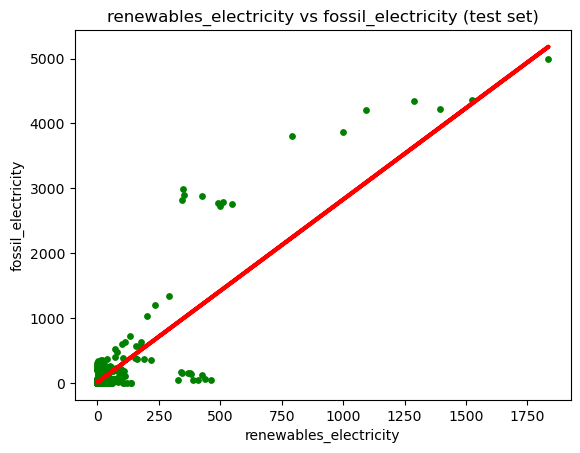

In [96]:
# create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(B_test, a_test, color='green', s = 15)
plot_test.plot(B_test, a_predicted, color='red', linewidth =3)
plot_test.title('renewables_electricity vs fossil_electricity (test set)')
plot_test.xlabel('renewables_electricity')
plot_test.ylabel('fossil_electricity')
plot_test.show()

In [97]:
# create objects that contain the model summary statistics and print the result.
rmse2 = mean_squared_error(a_test, a_predicted) 
r22 = r2_score(a_test, a_predicted) 
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[2.81882398]]
Mean squared error:  45496.72451675282
R2 score:  0.7809088805297214


In [98]:
# create a dataframe comparing the actual and predicted values of a.
data = pd.DataFrame({'Actual': a_test.flatten(), 'Predicted': a_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.44,9.006361
1,0.07,8.160714
2,18.80,72.429901
3,25.06,29.781094
4,3.43,17.716528
5,2.76,29.471024
6,0.03,8.329844
7,0.91,9.231867
8,4.01,8.160714
9,0.02,8.414408


In [99]:
# compare how the regression fits the training set 
a_predicted_train = regression2.predict(B_train) 

In [100]:
rmse2 = mean_squared_error(a_train, a_predicted_train)
r22 = r2_score(a_train, a_predicted_train)
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[2.81882398]]
Mean squared error:  34778.146327392
R2 score:  0.5794610917384952


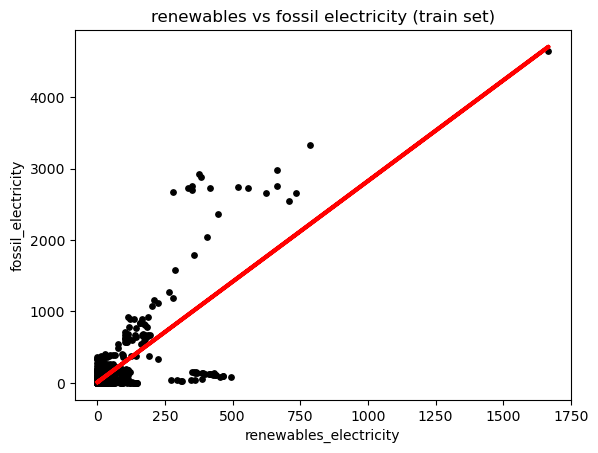

In [101]:
# visualizing the training set results.
plot_test = plt
plot_test.scatter(B_train, a_train, color='black', s = 15)
plot_test.plot(B_train, a_predicted_train, color='red', linewidth =3)
plot_test.title('renewables vs fossil electricity (train set)')
plot_test.xlabel('renewables_electricity')
plot_test.ylabel('fossil_electricity')
plot_test.show()

#### Comment
The model has R2 value of .78, and rmse of 45492. The latter value indicates that the linear model cannot accurately predict the influece of renewables on fossil fuels. This can also be confirmed by comparing the model output with the actual output which show large discrepancy. 

### Remove outlier and check performance

In [104]:
df_test = df[df['renewables_electricity'] < 1000]

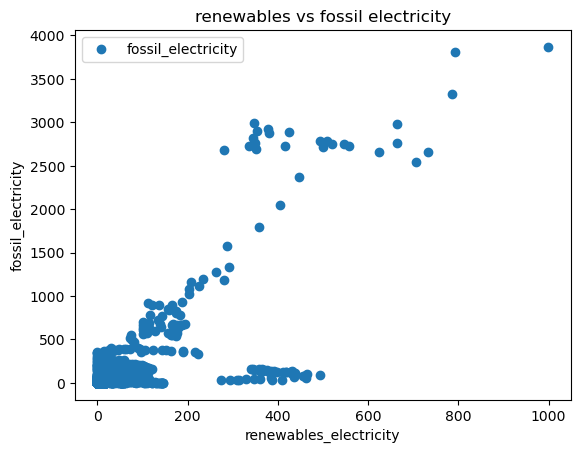

In [105]:
# check the scatterplot without outlier
df_test.plot(x = 'renewables_electricity', y='fossil_electricity', style='o')  
plt.title('renewables vs fossil electricity')  
plt.xlabel('renewables_electricity')  
plt.ylabel('fossil_electricity')  
plt.show()

In [106]:
# Reshape
B_2 = df_test['renewables_electricity'].values.reshape(-1,1)
a_2 = df_test['fossil_electricity'].values.reshape(-1,1)

In [107]:
B_train_2, B_test_2, a_train_2, a_test_2 = train_test_split(B_2, a_2, test_size=0.3, random_state=0)

In [108]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(B_train_2, a_train_2)

LinearRegression()

In [109]:
# Predict
a_predicted_2 = regression.predict(B_test_2)

In [110]:
rmse = mean_squared_error(a_test_2, a_predicted_2)
r2 = r2_score(a_test_2, a_predicted_2)

In [111]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.63037139]]
Mean squared error:  53017.468087163164
R2 score:  0.6002282805201407


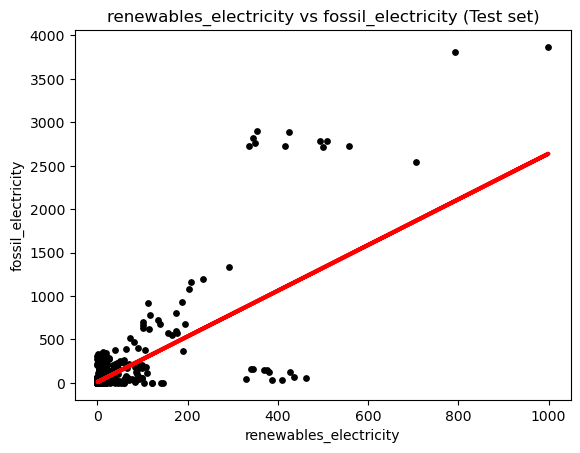

In [112]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(B_test_2, a_test_2, color='black', s = 15)
plot_test.plot(B_test_2, a_predicted_2, color='red', linewidth =3)
plot_test.title('renewables_electricity vs fossil_electricity (Test set)')
plot_test.xlabel('renewables_electricity')
plot_test.ylabel('fossil_electricity')
plot_test.show()

In [113]:
data = pd.DataFrame({'Actual': a_test_2.flatten(), 'Predicted': a_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,182.43,225.782101
1,141.72,31.160922
2,0.01,14.852619
3,19.52,9.960129
4,572.11,473.247442
5,0.10,22.059837
6,2.25,19.087517
7,12.79,9.065802
8,150.78,978.831127
9,142.40,31.450263


#### Comment
After removing the outlier, the model is still not a good predictor of the influence of renewables on fossil fuels.


#### Final Thoughts
The data is sourced from trustworthy sources. The inability of the linear models in predicting the dependent variables (greenhouse_gas_emissions and fossil_electricity), based on the independent variables indicated that the model chosen is not the right choice and therefore the models cannot accurately predict the results. 

In [115]:
# Export the dataframe
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'T4.csv'))